<a href="https://colab.research.google.com/github/Amma-Anjali/AIML2303A52385/blob/main/AIML_A09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Random Forest applied to LendingClub data set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

In [5]:
df = pd.read_csv('/content/loan_data.csv')

## Check out the info(), head(), and describe() methods on loans

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
print("Breakup of credit approval status.\n 1 means approved credit,\n 0 means not approved.")
print(df['credit.policy'].value_counts())

Breakup of credit approval status.
 1 means approved credit,
 0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


In [9]:
print(f"Top 5 criteria for Loan Approval:\n{df['purpose'].value_counts()}")

Top 5 criteria for Loan Approval:
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [11]:
print(f"Top 5 Int.Rates for Loan Approval:\n{df['int.rate'].value_counts()}")

Top 5 Int.Rates for Loan Approval:
int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64


### Exploratory Data Analysis
### Histogram of FICO scores by credit approval status

Text(0.5, 0, 'FICO score')

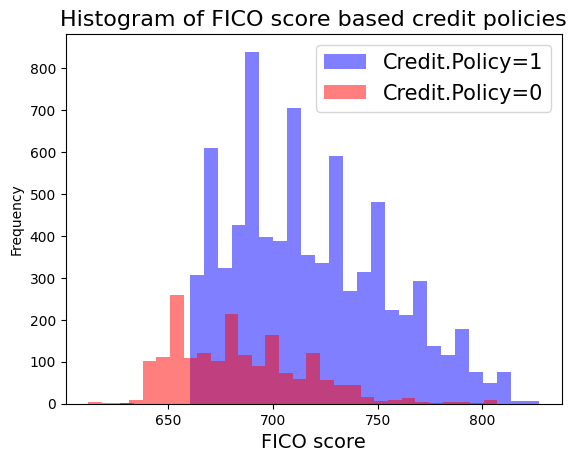

In [12]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,
                                             alpha=0.5,color='blue',
                                             label='Credit.Policy=1')

df[df['credit.policy']==0]['fico'].plot.hist(bins=30,
                                             alpha=0.5, color='red',
                                             label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score based credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

### Presence or absence of statistical difference of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

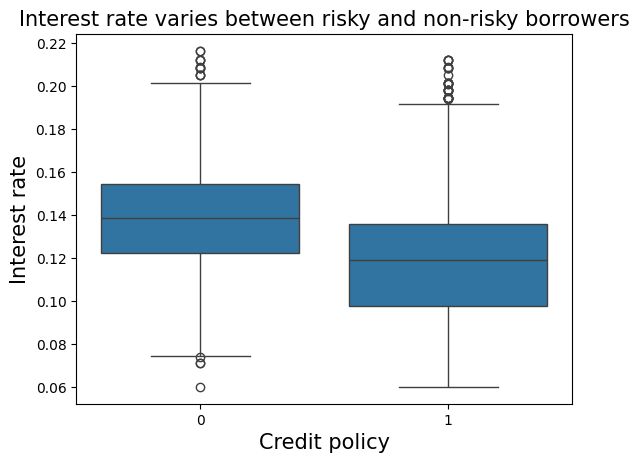

In [13]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log. annual income')

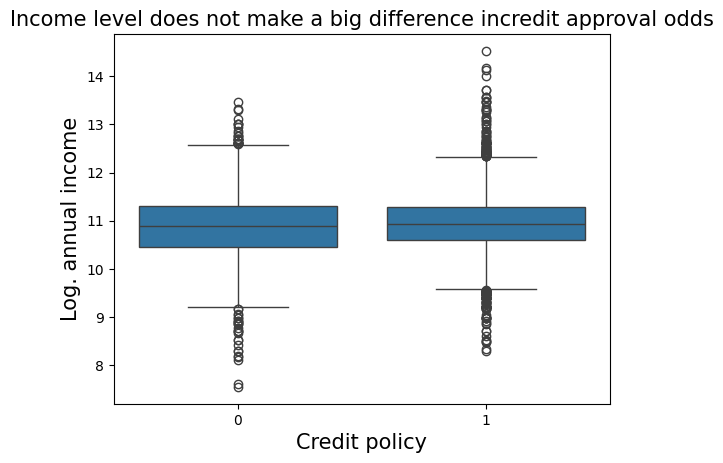

In [14]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference incredit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

Text(0, 0.5, 'Days with credit line')

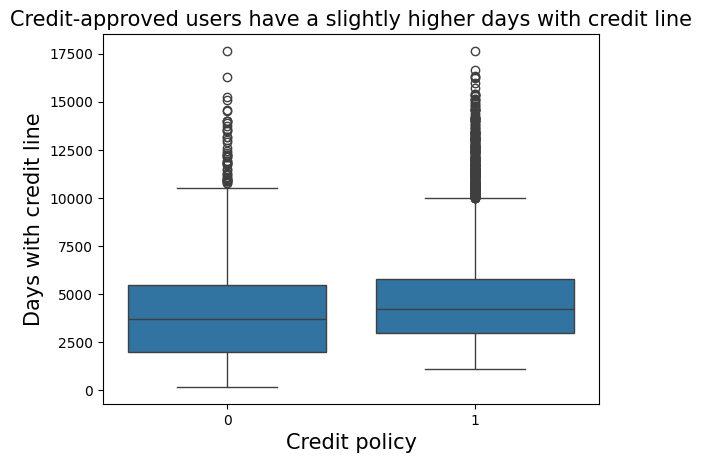

In [15]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

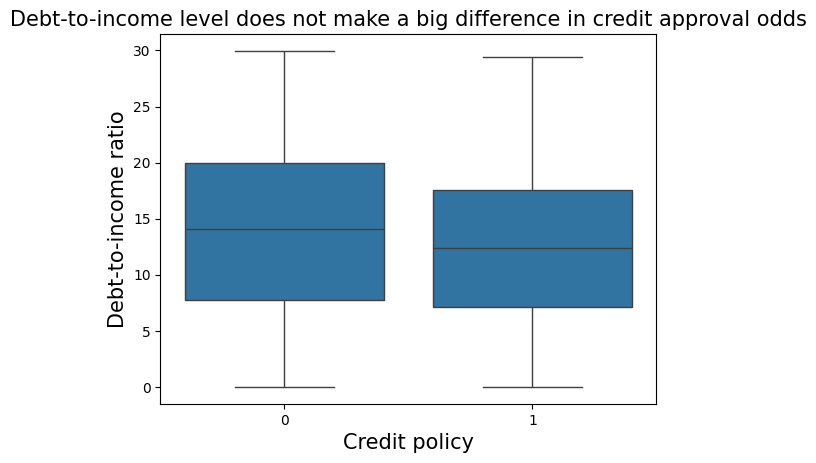

In [16]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

### Countplot of loans by purpose, with the color hue defined by not.fully.paid

Text(0.5, 0, 'Purpose')

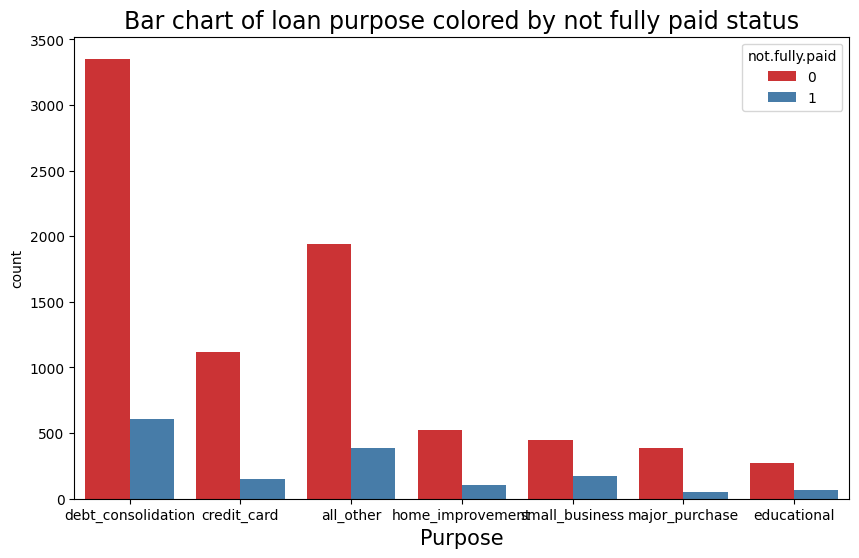

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

### Trend between FICO score and interest rate

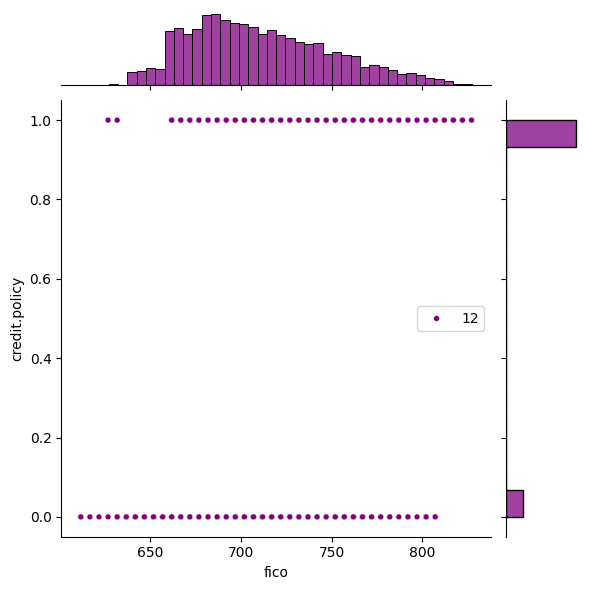

In [18]:
sns.jointplot(x='fico',y='credit.policy',data=df, color='purple', size=12)

### lmplot to see if the trend differed between not.fully.paid and credit.policy

<Figure size 1400x700 with 0 Axes>

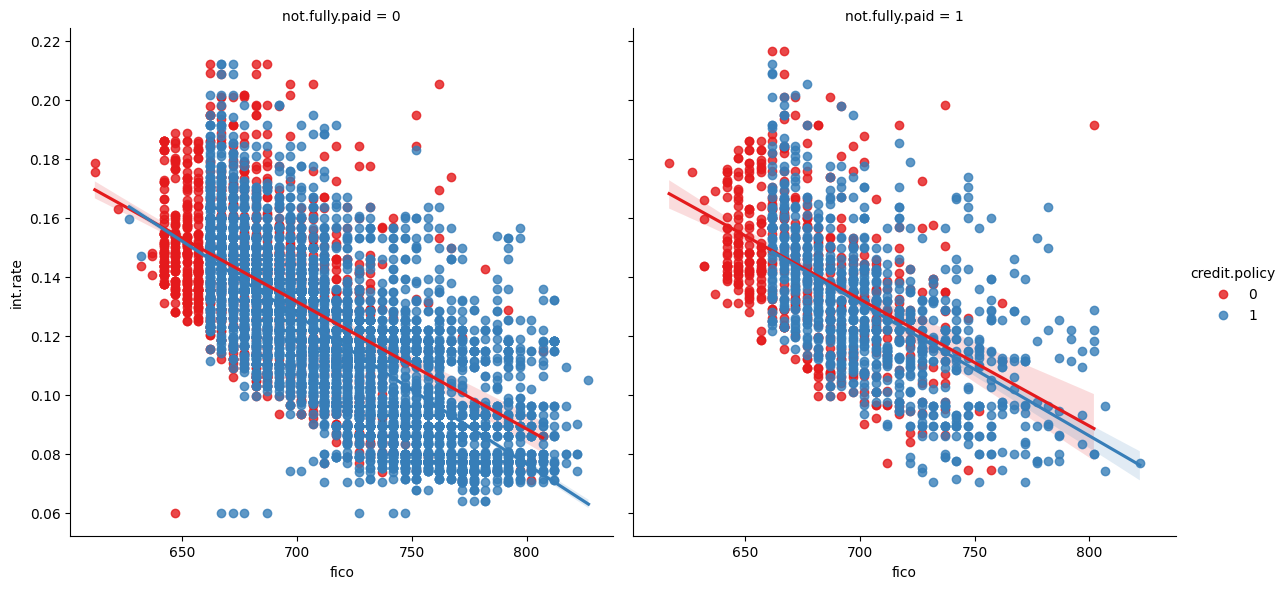

In [32]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1', height=6)


### Setting up the Data
### Categorical Features
The purpose column as categorical. We transform them using dummy variables so sklearn will be able to understand them.

In [23]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)

In [24]:
df.shape, df_final.shape, df_final.columns[14:]

((9578, 14),
 (9578, 19),
 Index(['purpose_debt_consolidation', 'purpose_educational',
        'purpose_home_improvement', 'purpose_major_purchase',
        'purpose_small_business'],
       dtype='object'))

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [26]:
df_final.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9578, 19), (7662, 18), (1916, 18), (7662,), (1916,))

### Training a Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

### Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [28]:
dtree = DecisionTreeClassifier(criterion='log_loss',max_depth=None)

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [34]:
train_pred  = dtree.predict(X_train)
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [36]:
print(f"Accuracy of Train:{accuracy_score(y_train,train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,predictions)}")

Accuracy of Train:1.0
Accuracy of Test:0.7223382045929019


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1623
           1       0.17      0.20      0.18       293

    accuracy                           0.72      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.75      0.72      0.73      1916



In [38]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1325  298]
 [ 234   59]]
Accuracy of prediction: 0.722


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=1000)

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

#### Predictions and Evaluation
#### Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [42]:
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

In [43]:
print(f"Accuracy of Train:{accuracy_score(y_train,rfc_train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,rfc_test_pred)}")

Accuracy of Train:1.0
Accuracy of Test:0.8470772442588727


**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [44]:
cr = classification_report(y_test,predictions)

In [45]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1623
           1       0.17      0.20      0.18       293

    accuracy                           0.72      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.75      0.72      0.73      1916



**Show the Confusion Matrix for the predictions.**

In [46]:
cm = confusion_matrix(y_test,rfc_test_pred)
print(cm)

[[1619    4]
 [ 289    4]]
